In [1]:
### Initial Data Analysis ###
# understanding the data, investigate data quality issues

In [16]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [3]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_3b08f636aa4c4bc58b03e36105622462 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='EI06iPS11MRoHQiLAPwMFIukCpW_Yx5PqbVhI0FSYqjZ',
    ibm_auth_endpoint="https://iam.eu-de.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_3b08f636aa4c4bc58b03e36105622462.get_object(Bucket='courserabadges-donotdelete-pr-72y9f6bzbckngj',Key='online_shoppers_intention.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
# Variables

# Administrative, Informational, ProductRelated -> Different types of web pages. Number of times visited in the sesssin.
# Administrative_Duraton, Informational_Duration, ProductRelated_Duration -> The total time per session spent on these website types.
# BounceRates -> Share of users that bounce (user enters website and exits without relevant activity).
# ExitRates -> Share of page views that ended the session (last page before exit) by the total number of page views. High exit rate means that users seem to exit often from a particular page.
# PageValues -> Mean number of visits before a transaction was processed. (does it mean only revenue=True cases can be counted? check!).
# SpecialDay -> How close the day was to a day with high expected revenues (e.g. Xmas).
# Month -> self explanatory
# OperatingSystems -> self explanatory
# Browser -> self explanatory
# Region -> self explanatory
# TrafficType -> Indicates whether a user has used the website befre,
# VisitorType -> e.g.- organic, referral, direct, social
# Weekend -> self explanatory
# Revenue -> self explanatory -> TARGET VECTOR

In [5]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [6]:
df.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [7]:
# visitor type has 3 realisations
df.VisitorType.unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [8]:
# Potential Issues:
# duration -> -1 does not make sense, also max outliers might be due to non-activity (relevant for feature eng)

# are page values a perfect indicator of revenue? if so, need to exclude this feature (Month, OperatingSystems, Browser, Region, TrafficType, VisitorType, Weekend (binary))
# one-hot-encode categorical variables (including the integer categories, e.g. traffic type, except the binary ones)
# transform revenue to binary (0,1)

# long tails and right skewed distributions, need to scale features due to very different value ranges

<IPython.core.display.Javascript object>


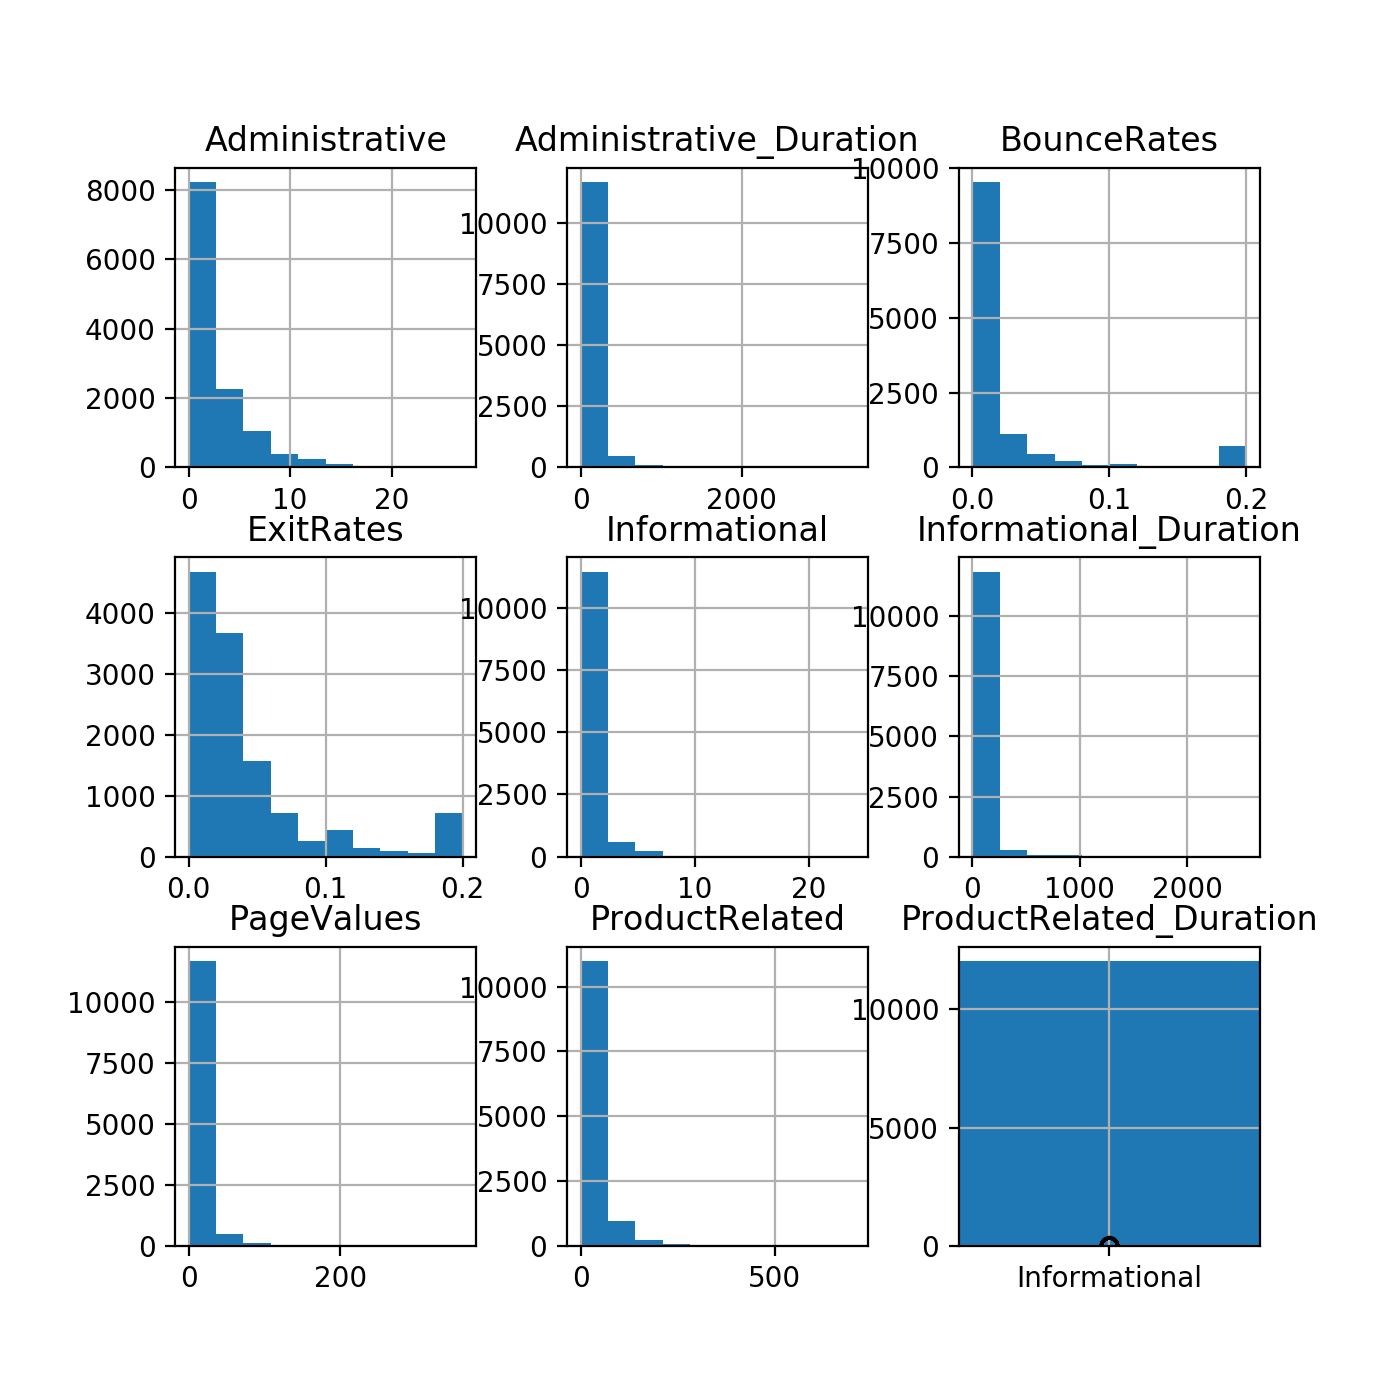

In [9]:
# check ranges for continuous features:
continuous_features = ['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues']

df_cont = df[continuous_features]
df_cont.hist(figsize=(7,7));

In [10]:
df[['Informational']].boxplot()

In [31]:
# Emptiness - delete the 14 rows
df.isnull().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

In [11]:
# Uniqueness/Duplicates -> the data has no IDs or similar, so it is hard to tell
df.duplicated().sum()
# df[df.duplicated()] -> seem to be natural occurances

119

In [12]:
# add visualisations

In [31]:
# 15% of the sessions generated revenue
round(df.Revenue.sum()/df.Revenue.count(),2)

0.15

<IPython.core.display.Javascript object>


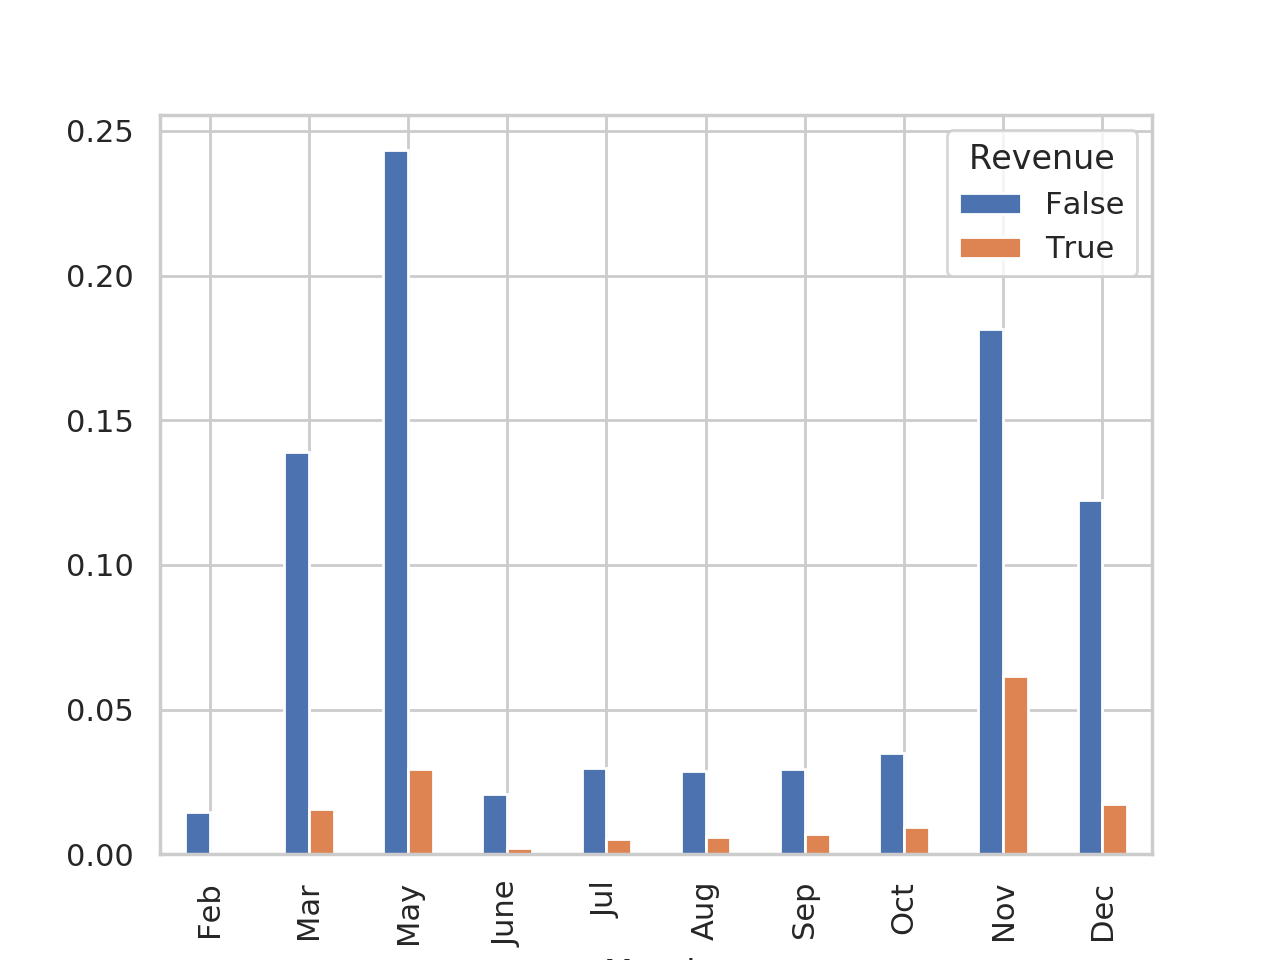

In [54]:
new_order = ['Feb', 'Mar', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

df_temp = pd.crosstab(df['Month'], df['Revenue'], normalize=True).reindex(new_order, axis=0)
df_temp.plot(kind='bar')

<IPython.core.display.Javascript object>


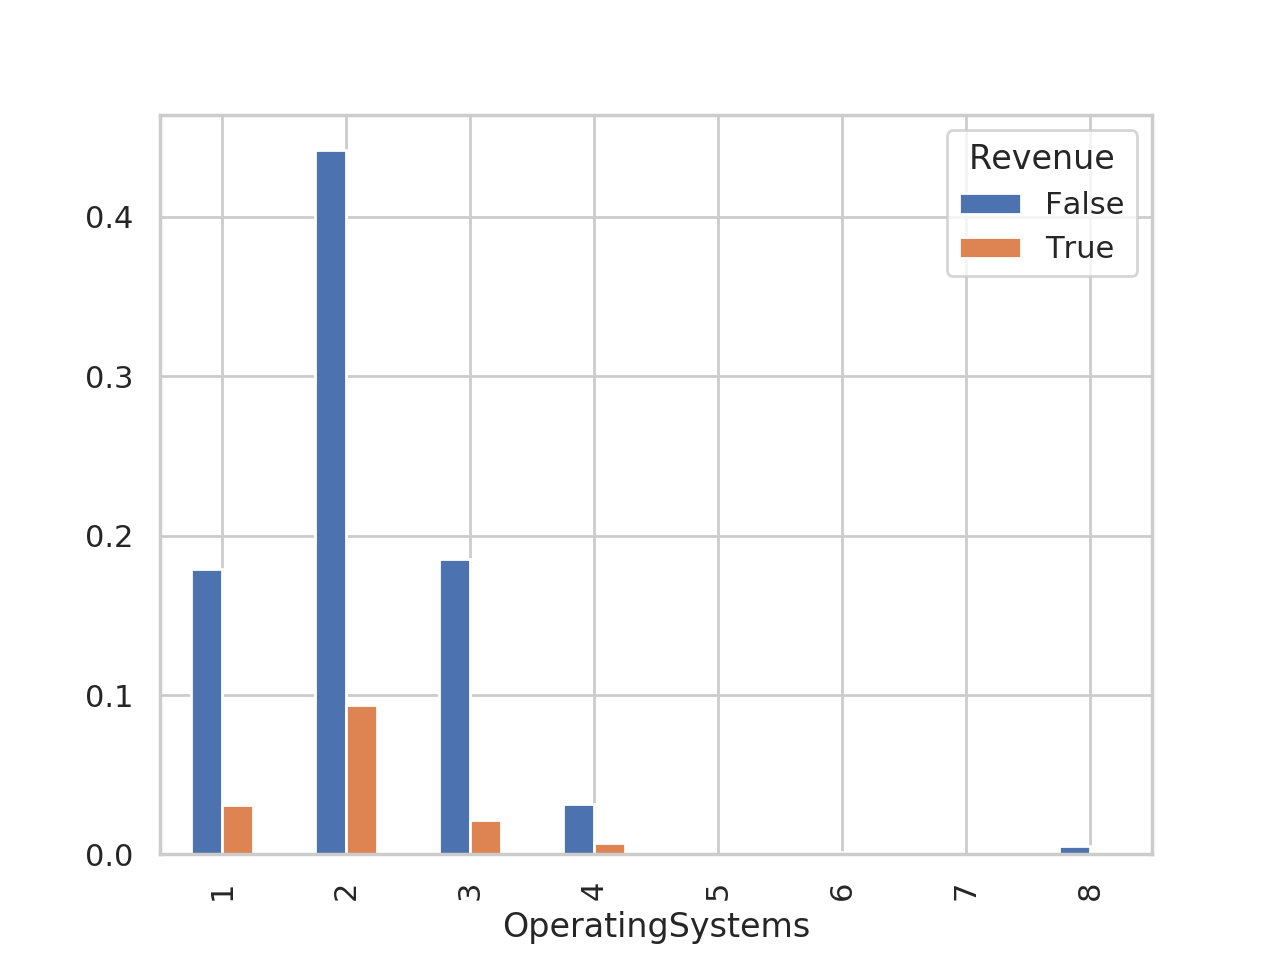

In [49]:
df_temp = pd.crosstab(df['OperatingSystems'], df['Revenue'], normalize=True)
df_temp.plot(kind='bar')

<IPython.core.display.Javascript object>


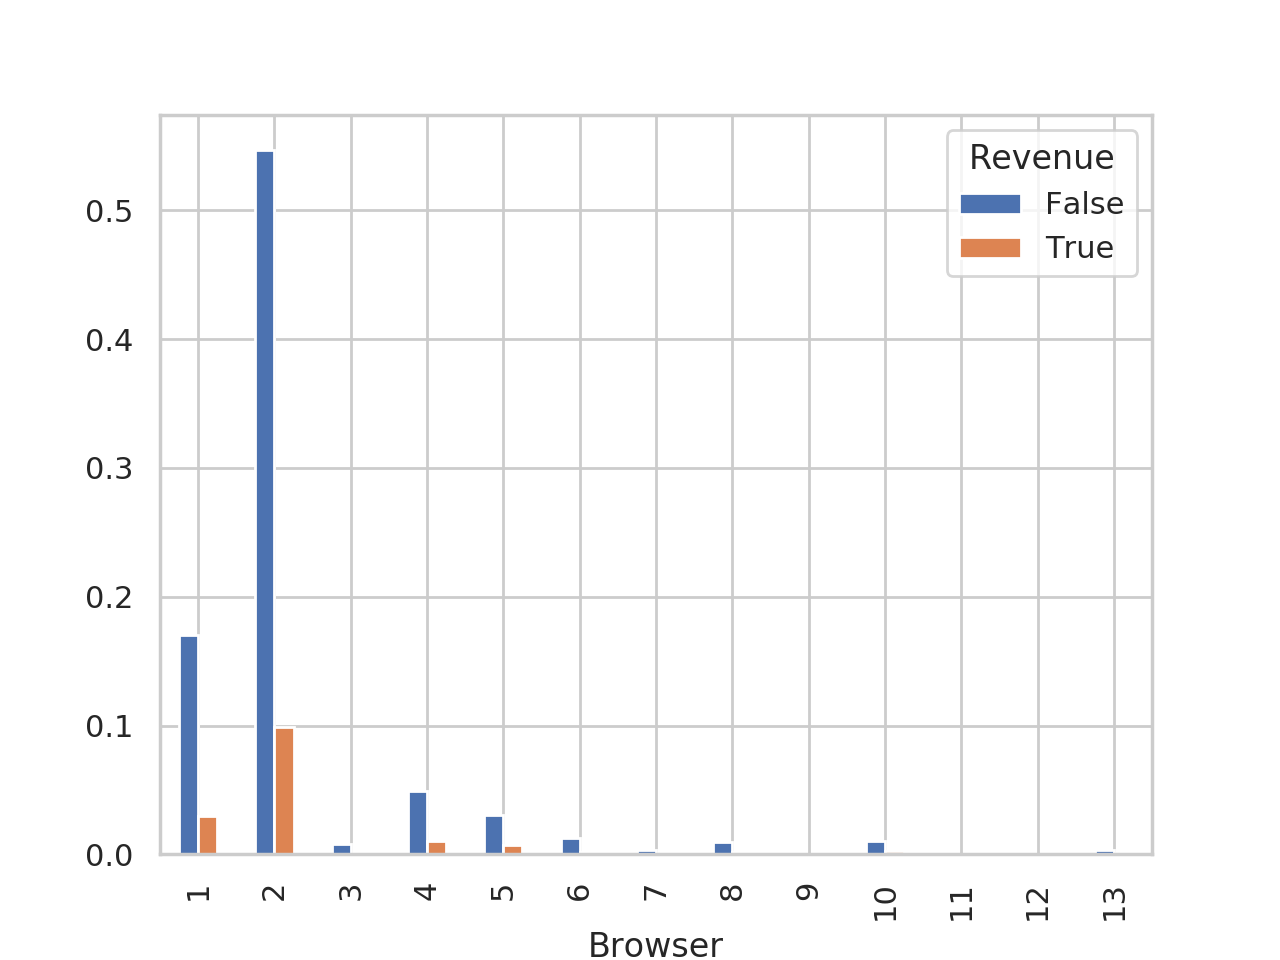

In [50]:
df_temp = pd.crosstab(df['Browser'], df['Revenue'], normalize=True)
df_temp.plot(kind='bar')

<IPython.core.display.Javascript object>


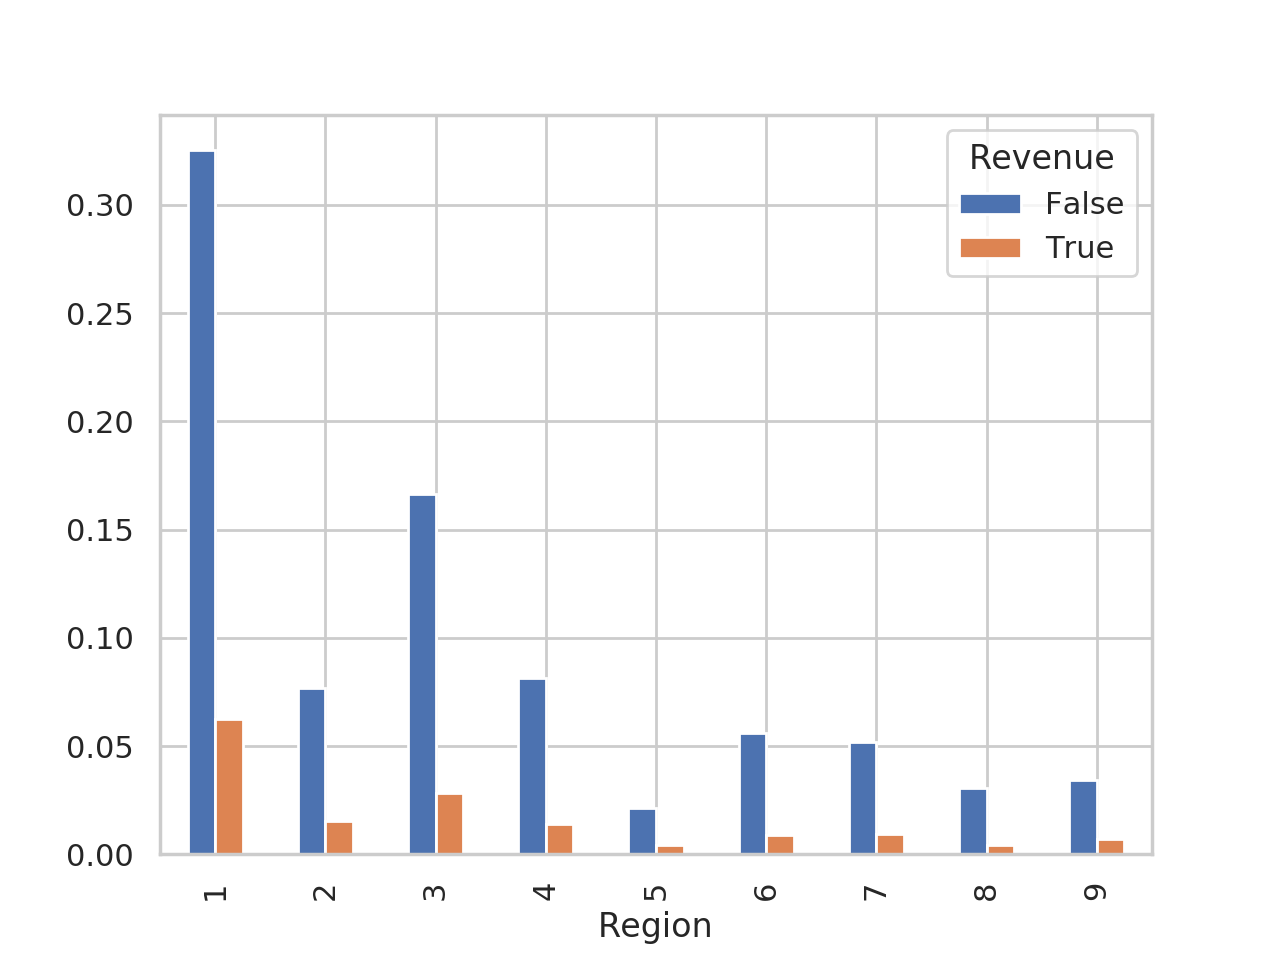

In [51]:
df_temp = pd.crosstab(df['Region'], df['Revenue'], normalize=True)
df_temp.plot(kind='bar')

<IPython.core.display.Javascript object>


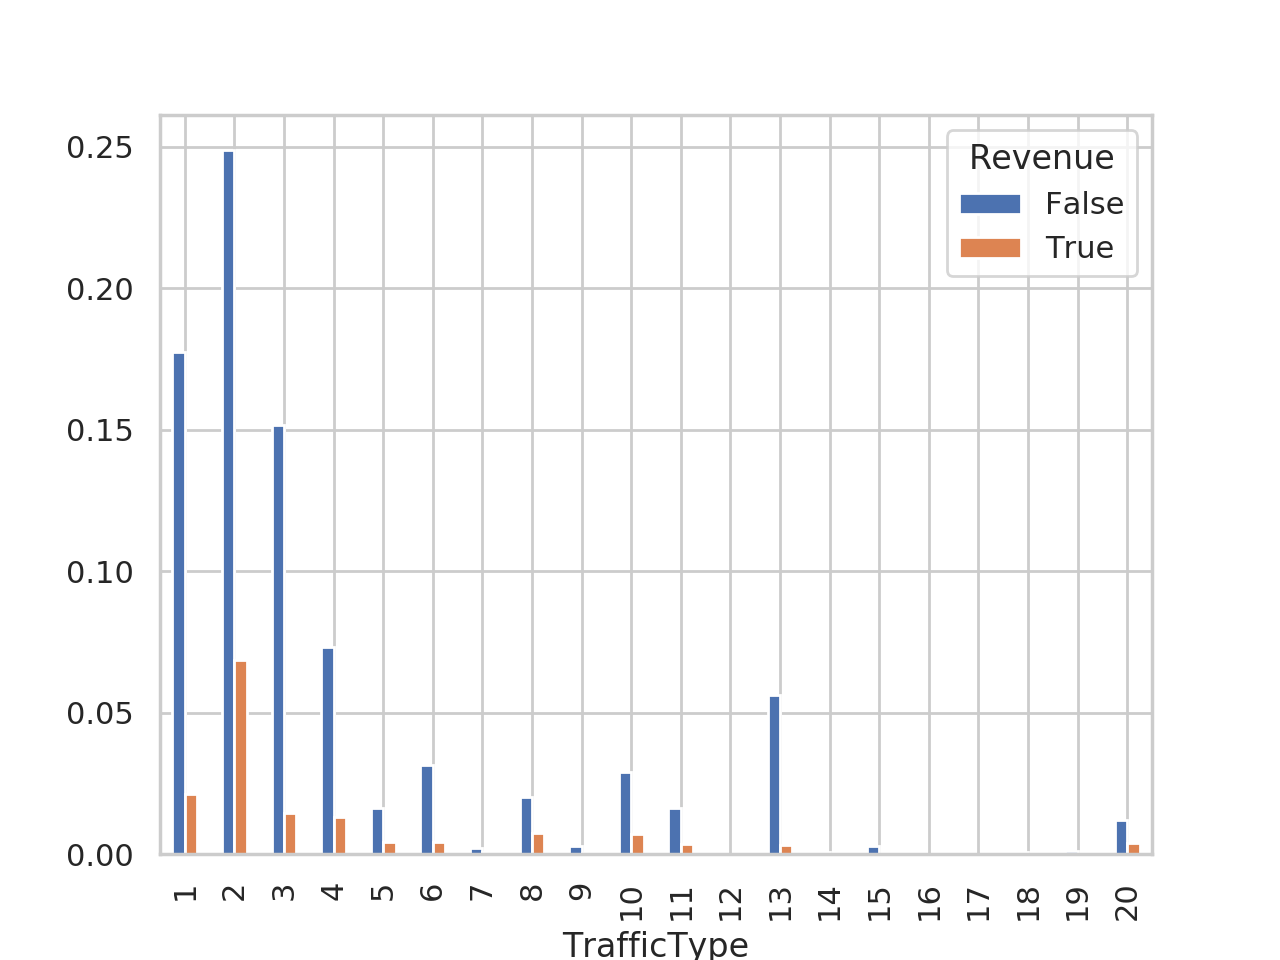

In [52]:
df_temp = pd.crosstab(df['TrafficType'], df['Revenue'], normalize=True)
df_temp.plot(kind='bar')

<IPython.core.display.Javascript object>


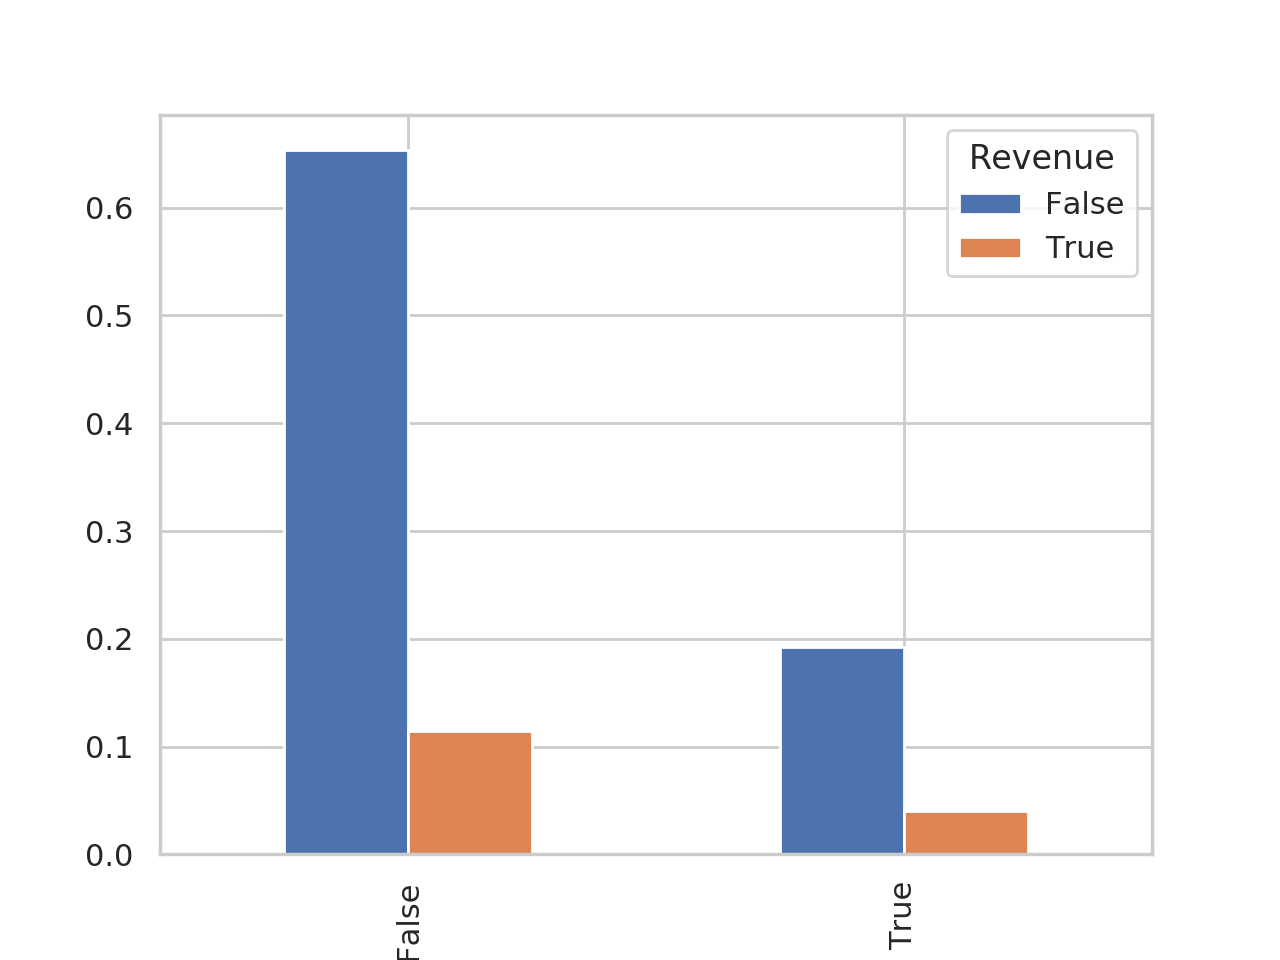

In [53]:
df_temp = pd.crosstab(df['Weekend'], df['Revenue'], normalize=True)
df_temp.plot(kind='bar')

<IPython.core.display.Javascript object>


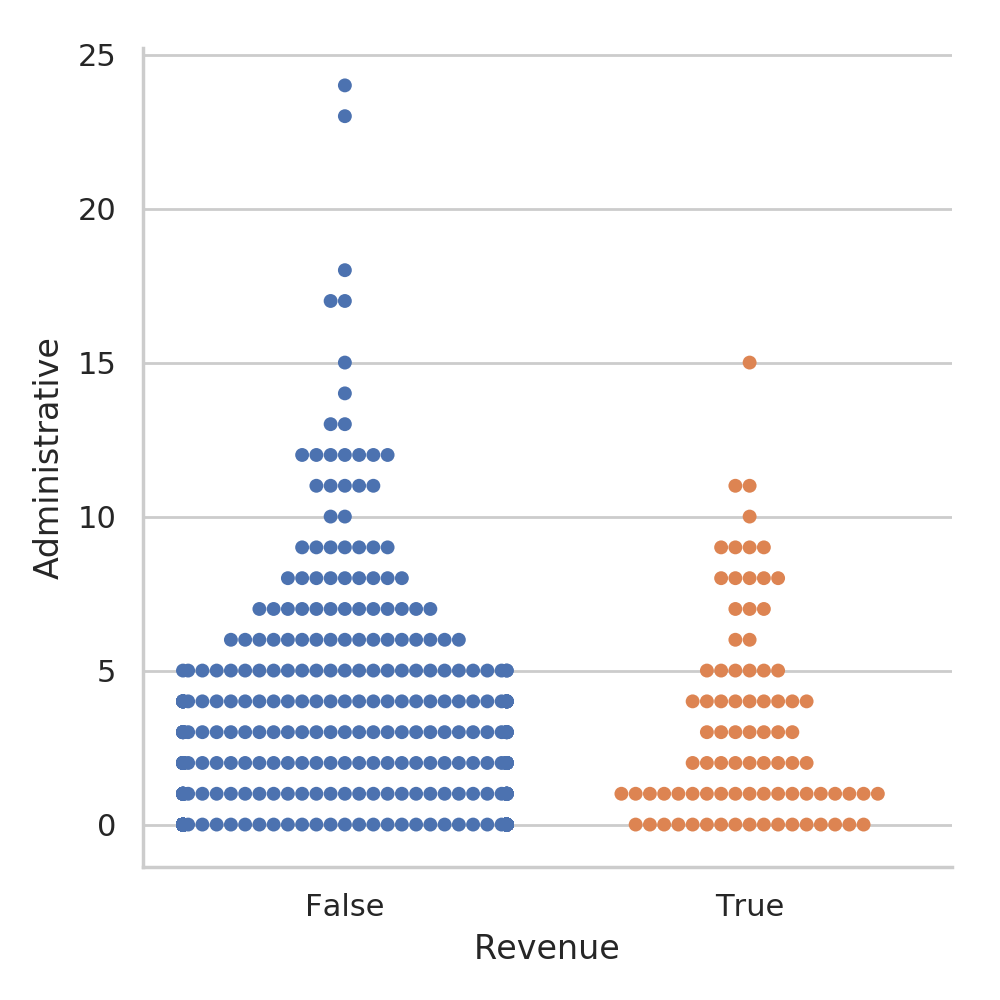

In [62]:
sns.catplot(x="Revenue", y="Administrative", kind="swarm", data=df.sample(frac=0.05));

<IPython.core.display.Javascript object>


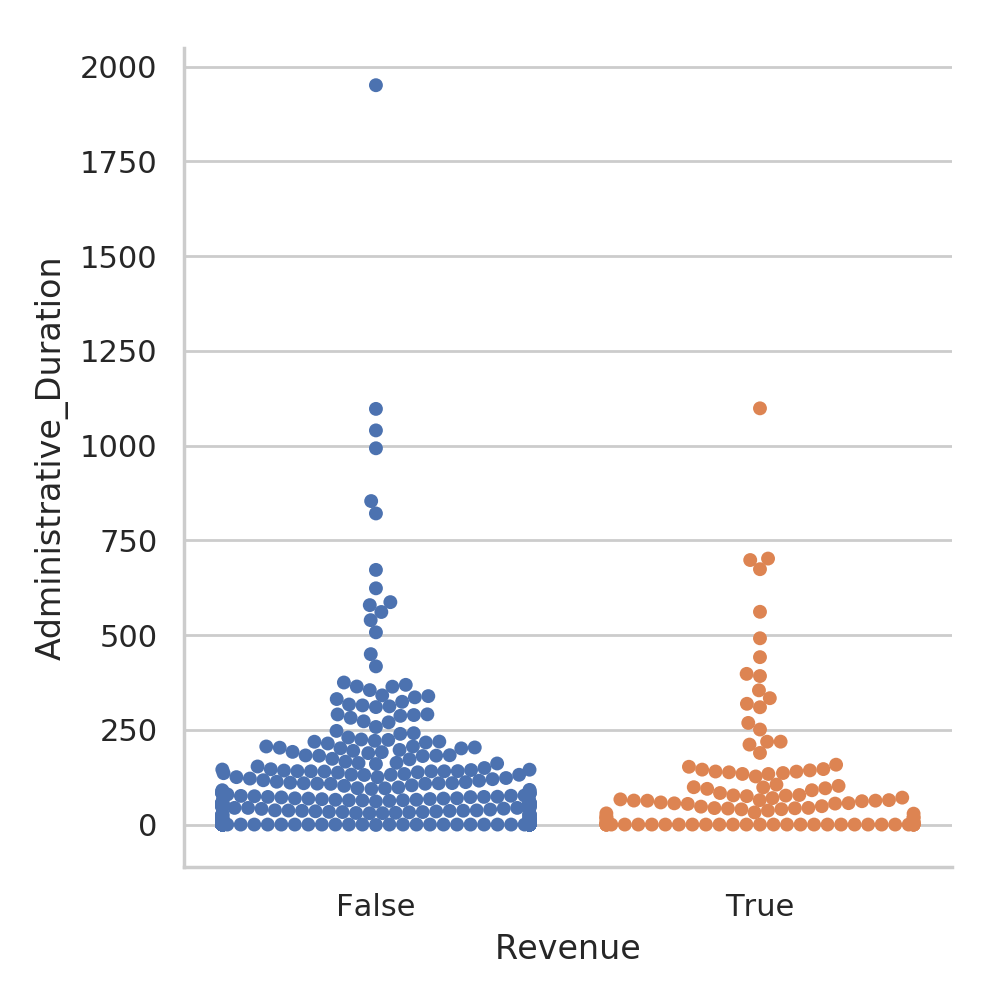

In [63]:
sns.catplot(x="Revenue", y="Administrative_Duration", kind="swarm", data=df.sample(frac=0.05));

<IPython.core.display.Javascript object>


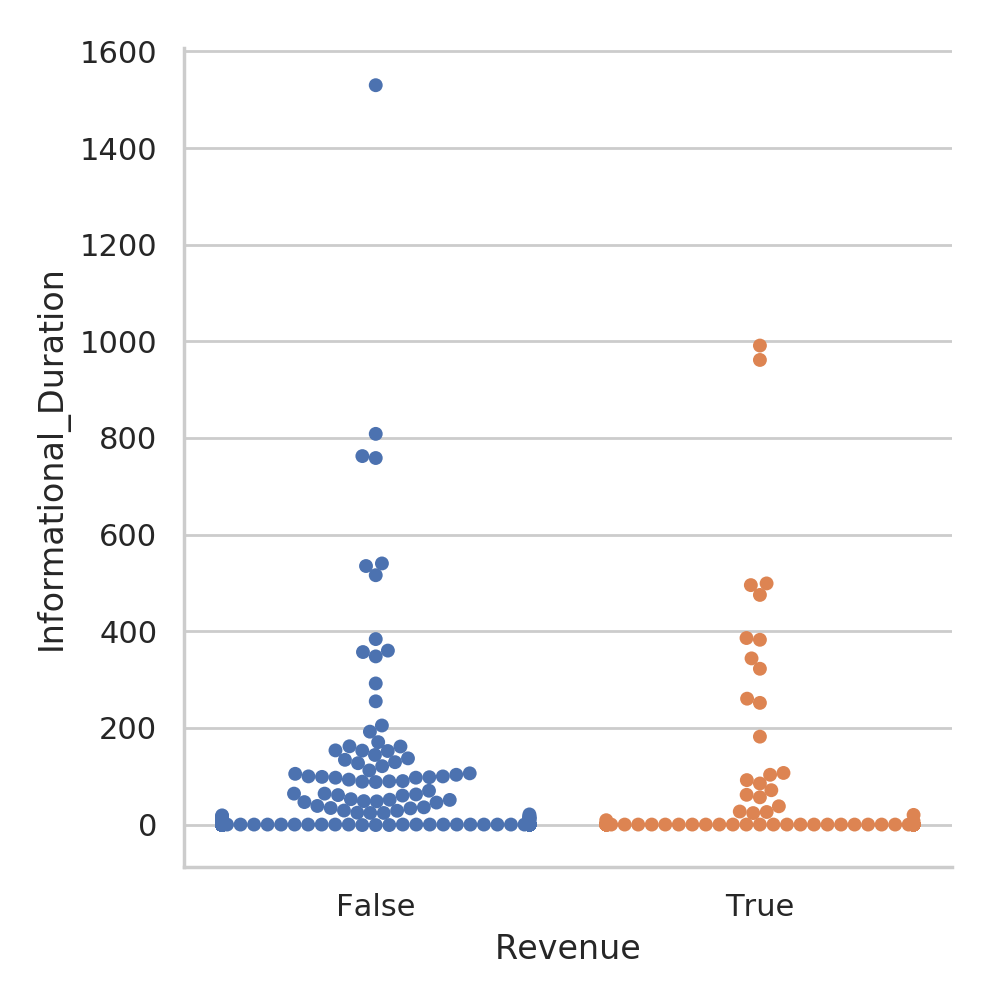

In [65]:
sns.catplot(x="Revenue", y="Informational_Duration", kind="swarm", data=df.sample(frac=0.05));

<IPython.core.display.Javascript object>


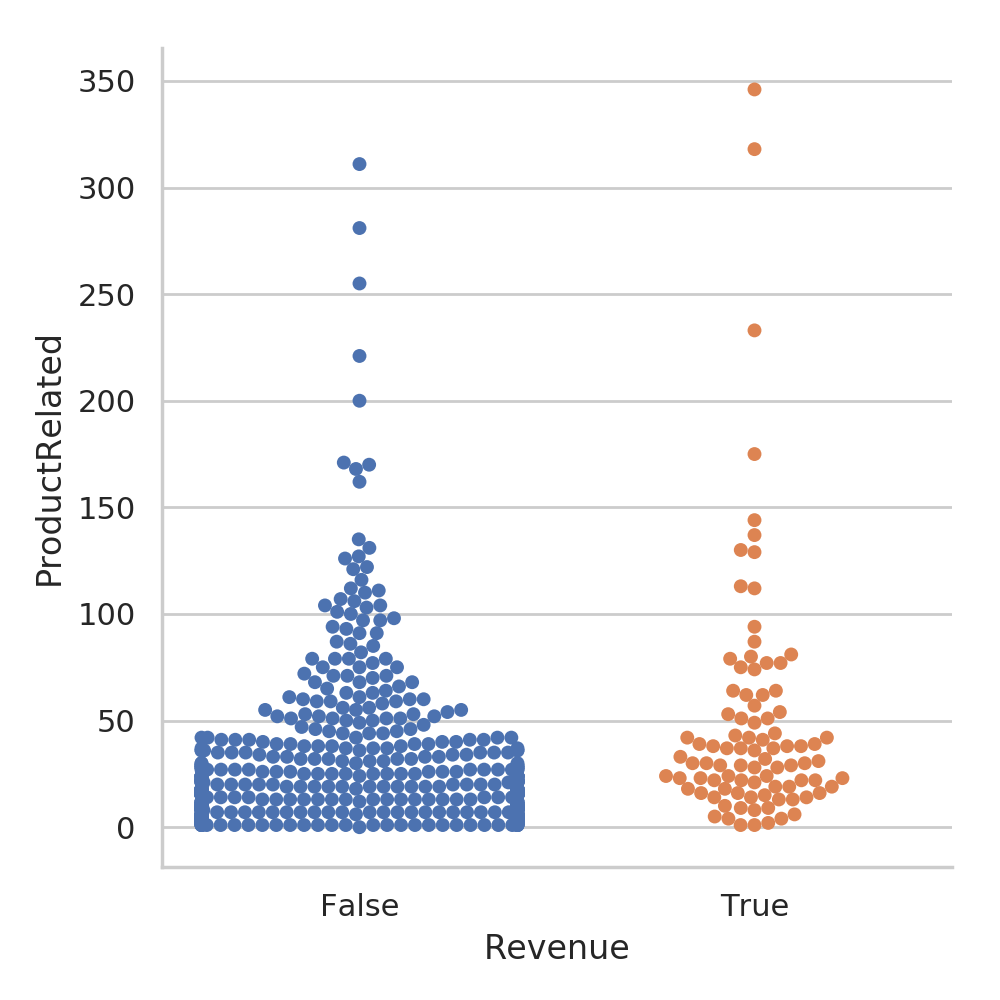

In [66]:
sns.catplot(x="Revenue", y="ProductRelated", kind="swarm", data=df.sample(frac=0.05));

<IPython.core.display.Javascript object>


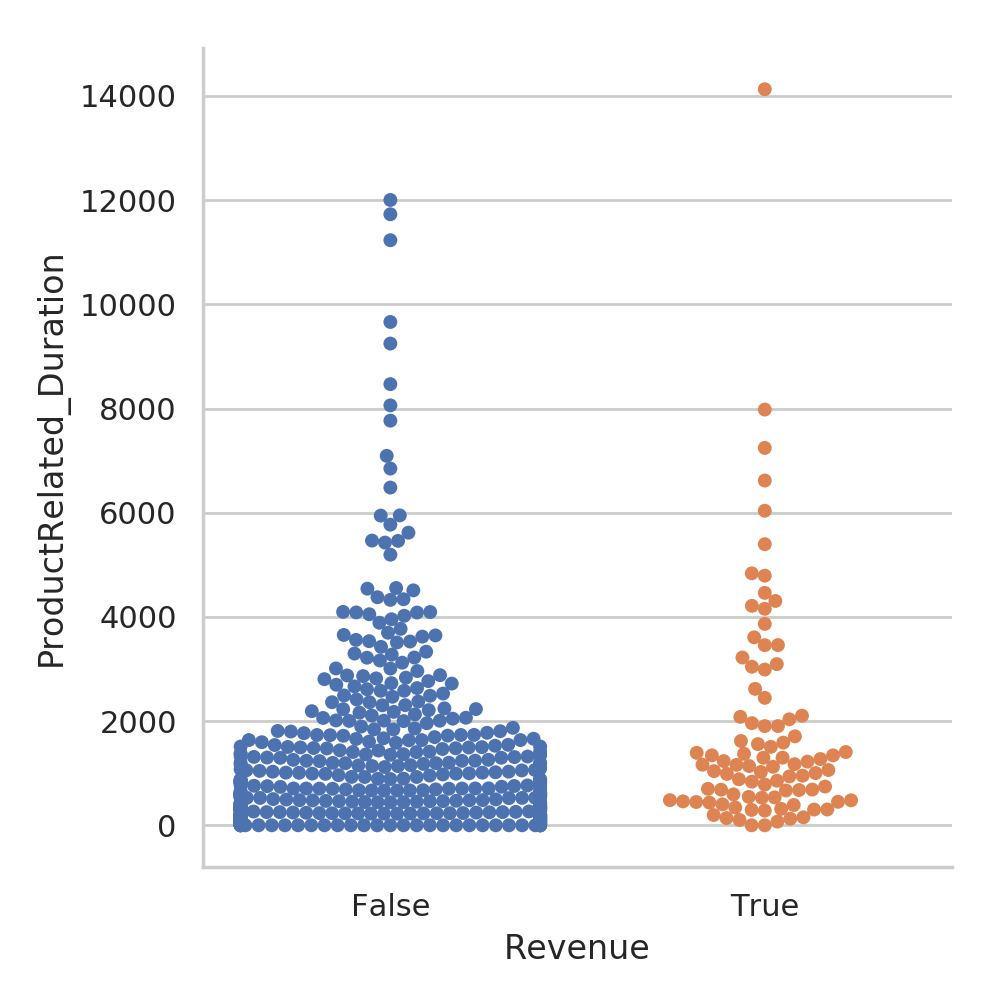

In [69]:
sns.catplot(x="Revenue", y="ProductRelated_Duration", kind="swarm", data=df.sample(frac=0.05));

<IPython.core.display.Javascript object>


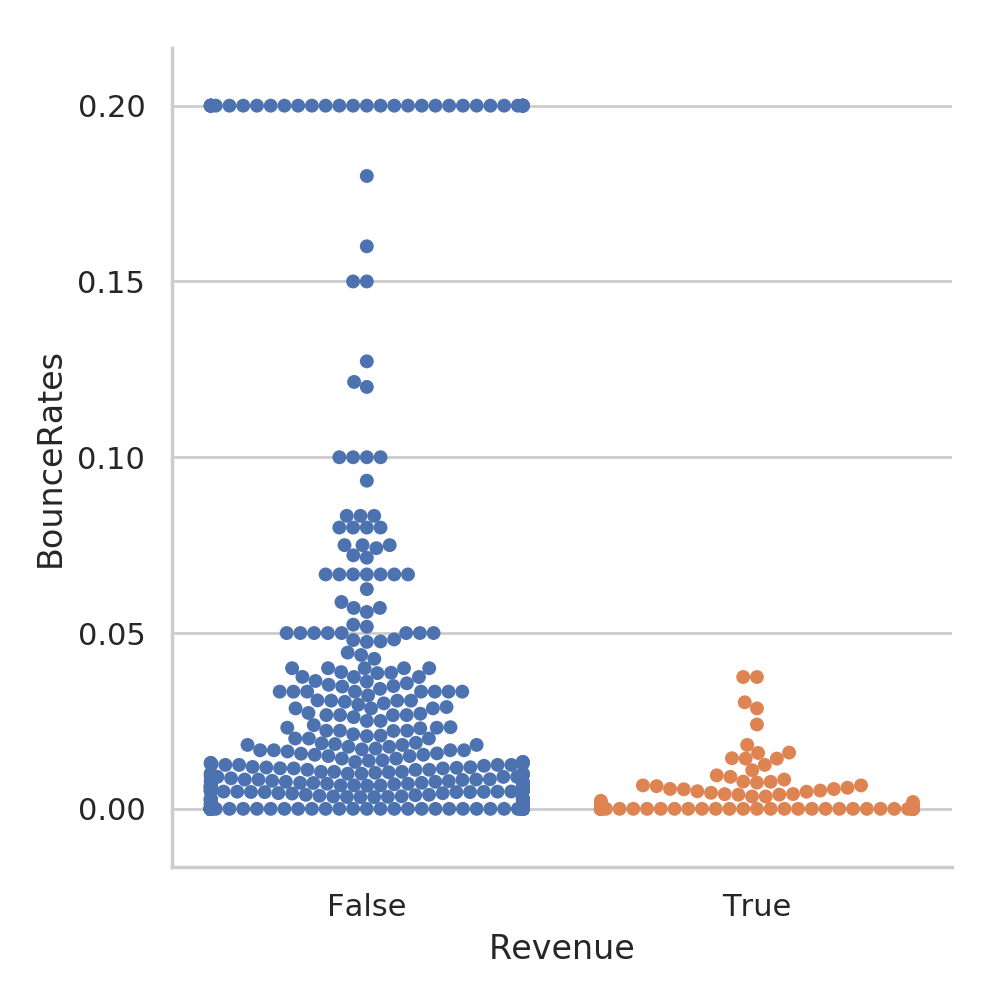

In [70]:
sns.catplot(x="Revenue", y="BounceRates", kind="swarm", data=df.sample(frac=0.05));

<IPython.core.display.Javascript object>


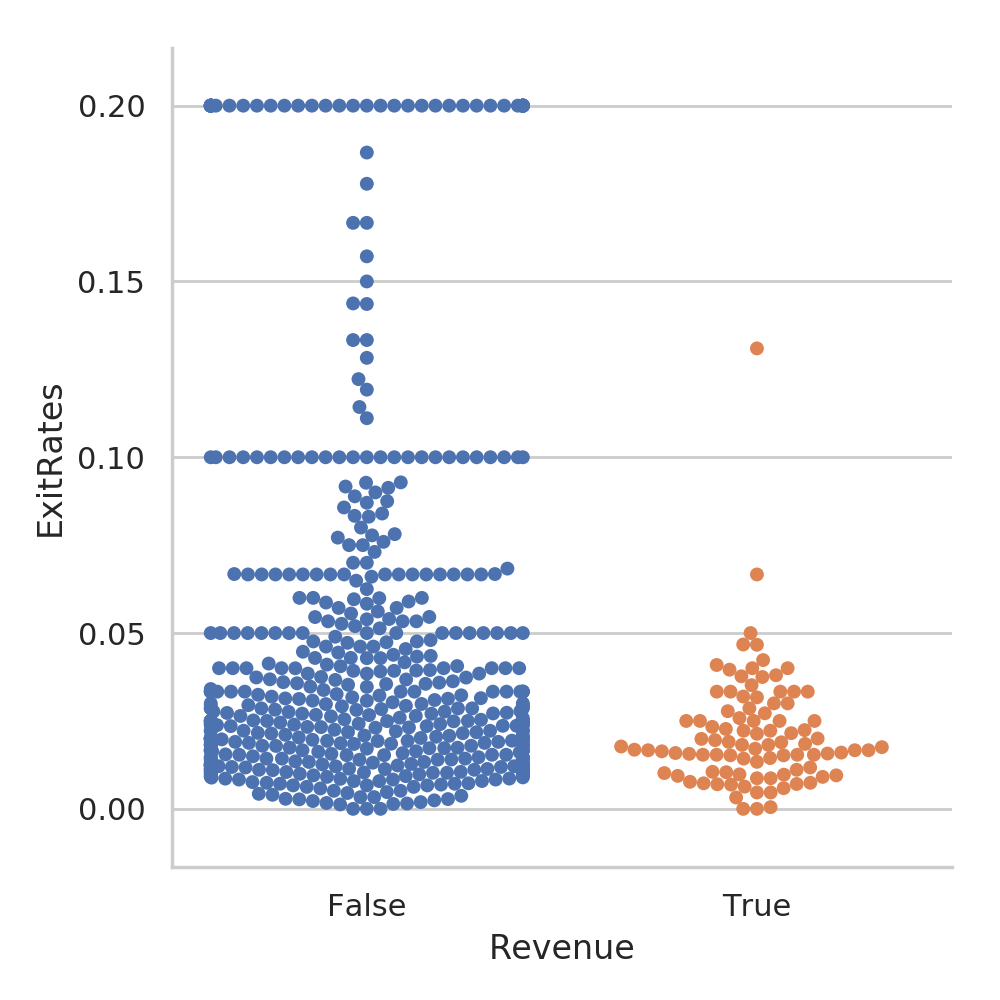

In [71]:
sns.catplot(x="Revenue", y="ExitRates", kind="swarm", data=df.sample(frac=0.05));

<IPython.core.display.Javascript object>


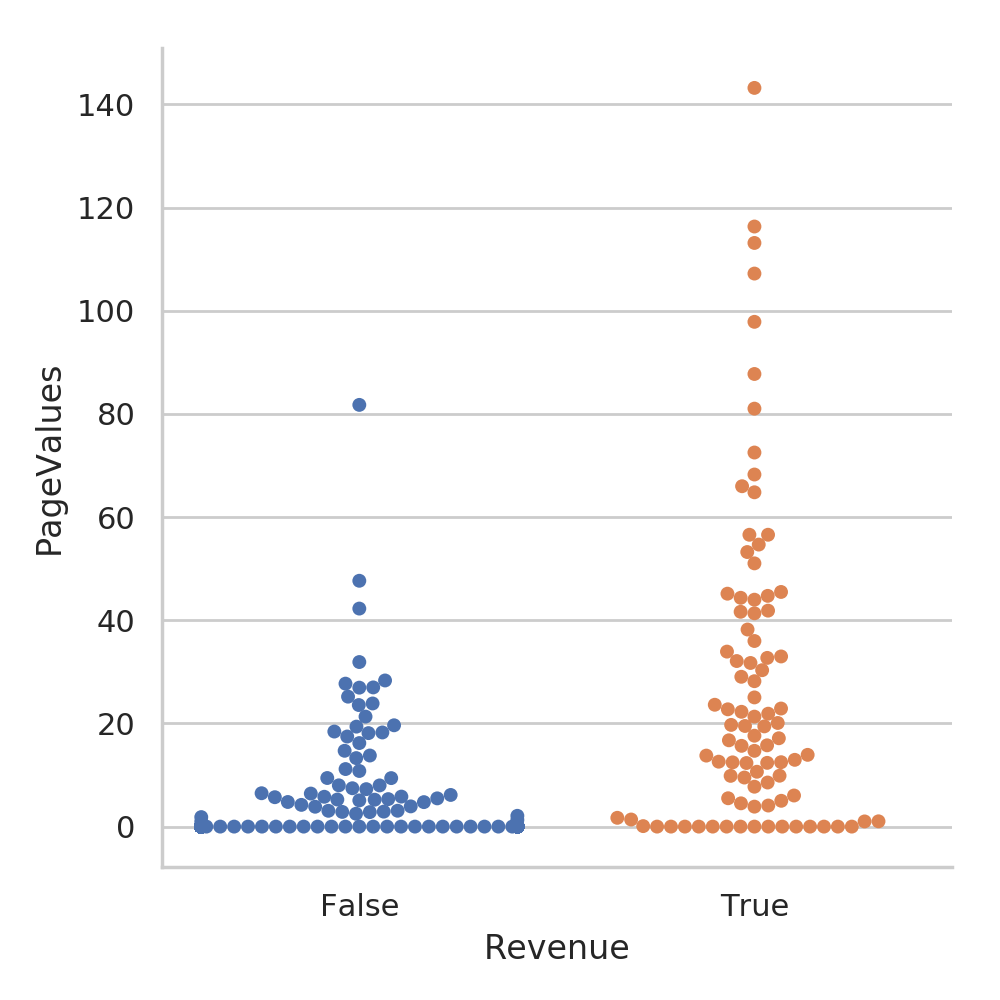

In [74]:
sns.catplot(x="Revenue", y="PageValues", kind="swarm", data=df.sample(frac=0.05));

<IPython.core.display.Javascript object>


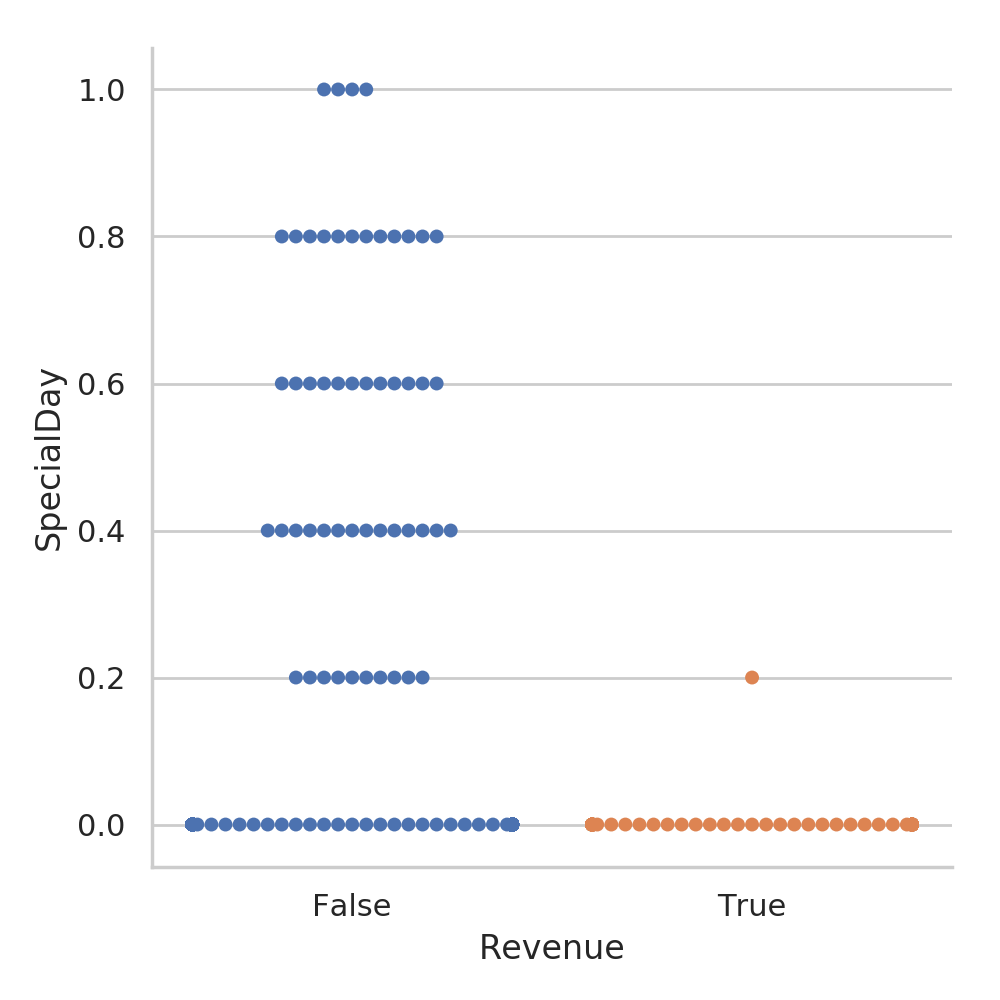

In [73]:
sns.catplot(x="Revenue", y="SpecialDay", kind="swarm", data=df.sample(frac=0.05));

In [13]:
df[df['Revenue']== True].PageValues.median(), df[df['Revenue']== False].PageValues.median(), df[df['Revenue']== False].PageValues.max()

(16.758133555, 0.0, 246.7585902)